In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# CSV dosyasını yükle
file_path = "casestudy-telco-costumer-churn.csv"
df = pd.read_csv(file_path)

# İlk 5 satırı göster
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


🔍 BULGU: İlk 5 kayıtta churn oranı %40 (2/5) ve sözleşme tiplerinin %60’ı (3/5) "Month-to-month" görünüyor; bu kısa vadeli kontratların erken ayrılma riski taşıdığını işaret ediyor.

💼 ETKİ: Müşteri Tutundurma Masası açısından yüksek churn eğilimi, tekrar kazanım maliyetlerini artırır ve aylık gelir sürekliliğini zayıflatır; özellikle kısa dönem kontratlı segmentte gelir volatilitesi yükselir.

⚡ AKSİYON: İlk 30 gün içindeki Month-to-month müşterilere hedefli tutundurma paketi (fiyat sabitleme + teknik destek avantajı) sunun; churn riski yüksek müşteriler için proaktif arama listesi oluşturup haftalık dönüşüm/iptal oranını KPI olarak takip edin.

In [3]:
# Veri setini yükle ve temel kontrol
file_path = "casestudy-telco-costumer-churn.csv"
df = pd.read_csv(file_path)

print("Boyut (satır, sütun):", df.shape)
display(df.head())

Boyut (satır, sütun): (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


🔍 BULGU: Veri dosyası başarıyla yüklendi; `df.shape` çıktısı ile satır-sütun yapısı doğrulandı ve `df.head()` ile ilk kayıtların alan tutarlılığı gözlemlendi.

💼 ETKİ: Müşteri Tutundurma Masası için güvenilir veri yapısı, churn risk segmentasyonu ve gelir kaybı tahminlerinde yanlış karar olasılığını azaltır; kampanya hedeflemelerinin doğruluğunu artırır.

⚡ AKSİYON: Analize başlamadan önce her çalıştırmada standart veri kalite kontrolü uygulayın (boş değer, yinelenen müşteri ID, veri tipi doğrulaması) ve sonuçları haftalık izleme raporuna KPI olarak ekleyin.

In [4]:
# Veri kalite ve özet analizleri
print("=== df.info() ===")
df.info()

print("\n=== df.describe() ===")
display(df.describe(include='all'))

print("\n=== df.isnull().sum() ===")
display(df.isnull().sum())

# tenure sütunu için detay istatistik
tenure_stats = df['tenure'].describe()
q1 = df['tenure'].quantile(0.25)
q3 = df['tenure'].quantile(0.75)

print("\n=== tenure detay ===")
print(f"min={tenure_stats['min']}, Q1={q1}, median={tenure_stats['50%']}, Q3={q3}, max={tenure_stats['max']}, mean={tenure_stats['mean']:.2f}, std={tenure_stats['std']:.2f}")
print(f"İlk 12 ay müşteri oranı: {(df['tenure'] <= 12).mean()*100:.2f}%")

=== df.info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 n

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN



=== df.isnull().sum() ===


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


=== tenure detay ===
min=0.0, Q1=9.0, median=29.0, Q3=55.0, max=72.0, mean=32.37, std=24.56
İlk 12 ay müşteri oranı: 31.04%


🔍 BULGU: `df.info()` ve `df.isnull().sum()` sonuçlarına göre 7.043 satır ve 21 sütunda eksik değer görünmüyor; ancak `TotalCharges` sütununun `object` tipinde olması veri tipi standardizasyonu ihtiyacını gösteriyor. `tenure` istatistikleri: min=0, Q1=9, medyan=29, Q3=55, max=72, ortalama=32.37, std=24.56; ilk 12 ay müşteri oranı %31.04.

💼 ETKİ: Müşteri Tutundurma Masası için yüksek standart sapma ve kısa kıdemli müşteri yoğunluğu, churn riskinin müşteri yaşam döngüsünün erken döneminde kümelenebileceğini gösterir. `TotalCharges` alanındaki tip tutarsızlığı, gelir kaybı ve CLV analizlerinde hatalı segmentasyon riski yaratır.

⚡ AKSİYON: `TotalCharges` sütununu sayısal tipe dönüştürüp (hatalı kayıtları işaretleyerek) veri kalite kontrol kuralına bağlayın. Ardından tenure bazlı 0-12, 13-24, 25+ ay kohortları için haftalık churn izleme paneli kurun ve ilk 12 ay segmentine proaktif tutundurma tekliflerini (indirim + destek paketi) önceliklendirin.

In [5]:
# Karar odaklı sütun seçimi ile yeni dataframe oluşturma
selected_columns = [
    'Churn', 'tenure', 'InternetService', 'OnlineSecurity', 'SeniorCitizen',
    'PhoneService', 'MultipleLines', 'Partner', 'Dependents', 'gender'
]

df2 = df[selected_columns].copy()

print("df2 boyut:", df2.shape)
display(df2.head())

df2 boyut: (7043, 10)


,Churn,tenure,InternetService,OnlineSecurity,SeniorCitizen,PhoneService,MultipleLines,Partner,Dependents,gender
0,No,1,DSL,No,0,No,No phone service,Yes,No,Female
1,No,34,DSL,Yes,0,Yes,No,No,No,Male
2,Yes,2,DSL,Yes,0,Yes,No,No,No,Male
3,No,45,DSL,Yes,0,No,No phone service,No,No,Male
4,Yes,2,Fiber optic,No,0,Yes,No,No,No,Female


🔍 BULGU: `df2`, hedef değişken (`Churn`) ile müşteri davranışı (`tenure`, `OnlineSecurity`, `InternetService`), hizmet yapısı (`PhoneService`, `MultipleLines`) ve demografik/ilişki sinyallerini (`SeniorCitizen`, `Partner`, `Dependents`, `gender`) birlikte tutar. Bu seçim, karar üretmeyen veya operasyonel detay niteliğindeki sütunları dışarıda bırakarak analizi sadeleştirir.

💼 ETKİ: Müşteri Tutundurma Masası için daha az ama anlamlı değişkenle çalışmak, churn tahmini ve segment bazlı kampanya kararlarını hızlandırır; model gürültüsü azalır, aksiyonlanabilir içgörü üretim süresi kısalır.

⚡ AKSİYON: Karar destek sürecinde her sütunu "tahmin gücü + aksiyona dönüşebilirlik" filtresinden geçirin; `df2`yi temel analiz tablosu yapıp, performansı artırmayan sütunları sonraki iterasyonlarda sistematik olarak eleme (feature pruning) politikası uygulayın.

In [6]:
# Churn dağılımı ve yüzdelik oran analizi
churn_counts = df['Churn'].value_counts()
churn_rates = df['Churn'].value_counts(normalize=True) * 100

print("=== Churn sayısal dağılım ===")
display(churn_counts)

print("\n=== Churn yüzdelik dağılım (%) ===")
display(churn_rates.round(2))

# Finansal risk havuzu (aylık gelir tabanı üzerinden)
total_monthly_revenue = df['MonthlyCharges'].sum()
risk_pool_monthly = df.loc[df['Churn'] == 'Yes', 'MonthlyCharges'].sum()
risk_pool_ratio = (risk_pool_monthly / total_monthly_revenue) * 100

print(f"\nToplam müşteri: {len(df)}")
print(f"Churn müşteri sayısı: {churn_counts.get('Yes', 0)}")
print(f"Churn oranı: {churn_rates.get('Yes', 0):.2f}%")
print(f"Aylık finansal risk havuzu (churn segmenti aylık ücret toplamı): {risk_pool_monthly:,.2f}")
print(f"Toplam aylık gelir içindeki risk havuzu payı: {risk_pool_ratio:.2f}%")

=== Churn sayısal dağılım ===


Churn
No     5174
Yes    1869
Name: count, dtype: int64


=== Churn yüzdelik dağılım (%) ===


Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64


Toplam müşteri: 7043
Churn müşteri sayısı: 1869
Churn oranı: 26.54%
Aylık finansal risk havuzu (churn segmenti aylık ücret toplamı): 139,130.85
Toplam aylık gelir içindeki risk havuzu payı: 30.50%


🔍 BULGU: `Churn` dağılımında 7.043 müşterinin 1.869’u kaybedilmiş durumda; mevcut churn oranı %26.54. Churn segmentinin aylık ücret toplamı 139,130.85 olup toplam aylık gelir tabanının %30.50’sine karşılık geliyor; yani kayıp riski müşteri oranından daha yüksek bir gelir yoğunluğu taşıyor.

💼 ETKİ: Müşteri Tutundurma Masası açısından bu tablo, finansal risk havuzunun kritik büyüklükte olduğunu gösterir. Churn’in gelirdeki payının yüksekliği, kısa vadede nakit akışı baskısı ve orta vadede CLV erozyonu yaratarak kârlılık hedeflerini tehdit eder.

⚡ AKSİYON: İlk fazda churn olasılığı yüksek ve `MonthlyCharges` seviyesi ortalamanın üstünde olan müşterileri “öncelikli gelir koruma havuzu”na alın; bu gruba 90 günlük tutundurma paketi (fiyat koruma + güvenlik/teknik destek değeri) uygulayıp, haftalık olarak “korunan gelir (₺/$)” KPI’ı ile performansı yönetin.

In [7]:
# 1) İlk 6 aydaki yeni müşteriler
seg_new_6m = df[df['tenure'] <= 6]
new_6m_count = len(seg_new_6m)
new_6m_churn_count = (seg_new_6m['Churn'] == 'Yes').sum()
new_6m_churn_rate = (new_6m_churn_count / new_6m_count) * 100 if new_6m_count > 0 else 0

print("Segment: İlk 6 aydaki yeni müşteriler")
print(f"Müşteri sayısı: {new_6m_count}")
print(f"Churn müşteri sayısı: {new_6m_churn_count}")
print(f"Churn oranı: {new_6m_churn_rate:.2f}%")

Segment: İlk 6 aydaki yeni müşteriler
Müşteri sayısı: 1481
Churn müşteri sayısı: 784
Churn oranı: 52.94%


🔍 BULGU: İlk 6 aydaki yeni müşteri segmentinde churn oranı bu hücrede hesaplanan değerdedir; erken dönem ayrılma davranışı genellikle onboarding ve ilk deneyim kalitesiyle ilişkilidir.

💼 ETKİ: Müşteri Tutundurma Masası açısından bu segmentte kayıp yaşanması, müşteri yaşam boyu değeri (CLV) yaratılmadan gelir akışının kesilmesine neden olur ve edinim maliyetinin geri dönüşünü düşürür.

⚡ AKSİYON: İlk 90 gün için “erken uyarı tutundurma akışı” tasarlayın (ilk fatura şoku kontrolü, kullanım rehberliği, memnuniyet araması). Eğer bu segmentin churn oranı diğer iki segmentten yüksekse en acil müdahale önceliği bu gruba verilmelidir.

In [8]:
# 2) Fiber Optik kullanıcıları
seg_fiber = df[df['InternetService'] == 'Fiber optic']
fiber_count = len(seg_fiber)
fiber_churn_count = (seg_fiber['Churn'] == 'Yes').sum()
fiber_churn_rate = (fiber_churn_count / fiber_count) * 100 if fiber_count > 0 else 0

print("Segment: Fiber Optik kullanıcıları")
print(f"Müşteri sayısı: {fiber_count}")
print(f"Churn müşteri sayısı: {fiber_churn_count}")
print(f"Churn oranı: {fiber_churn_rate:.2f}%")

Segment: Fiber Optik kullanıcıları
Müşteri sayısı: 3096
Churn müşteri sayısı: 1297
Churn oranı: 41.89%


🔍 BULGU: Fiber Optik segmentinin churn oranı bu hücrede hesaplanan değerdedir; bu oran, premium servis kullanan bir müşteri tabanında deneyim/fiyat dengesinin hassas olduğunu gösterebilir.

💼 ETKİ: Fiber müşteri kaybı, birim gelir seviyesi yüksek profillerde gelir erozyonunu hızlandırır ve finansal risk havuzunu büyütür.

⚡ AKSİYON: Fiber kullanıcılarında hız/arıza/çağrı merkezi temas verisini churn sinyaliyle eşleştirerek “yüksek değerli müşteri koruma programı” uygulayın. Eğer bu segmentin churn oranı en yüksek çıkarsa acil müdahale önceliğini Fiber Optik grubuna kaydırın.

In [9]:
# 3) Güvenlik paketi olmayanlar
seg_no_security = df[df['OnlineSecurity'] == 'No']
no_security_count = len(seg_no_security)
no_security_churn_count = (seg_no_security['Churn'] == 'Yes').sum()
no_security_churn_rate = (no_security_churn_count / no_security_count) * 100 if no_security_count > 0 else 0

print("Segment: Güvenlik paketi olmayanlar")
print(f"Müşteri sayısı: {no_security_count}")
print(f"Churn müşteri sayısı: {no_security_churn_count}")
print(f"Churn oranı: {no_security_churn_rate:.2f}%")

Segment: Güvenlik paketi olmayanlar
Müşteri sayısı: 3498
Churn müşteri sayısı: 1461
Churn oranı: 41.77%


🔍 BULGU: Güvenlik paketi olmayan segmentin churn oranı bu hücrede hesaplanan değerdedir; güvenlik/ek hizmet kullanımının düşük olması, bağlılık düzeyinin zayıf olduğuna işaret edebilir.

💼 ETKİ: Bu grupta churn’in artması, çapraz satış fırsatlarının kaybı ve müşteri başına ortalama gelirin düşmesiyle sonuçlanır.

⚡ AKSİYON: Güvenlik paketi olmayan müşteriler için düşük maliyetli “güvenlik eklenti deneme + sadakat indirimi” kurgulayın. Eğer bu segment en yüksek churn oranına sahipse, en acil müdahale bu gruba yönlendirilmeli; değilse ikinci öncelik olarak yönetilmelidir.

In [10]:
# InternetService ve OnlineSecurity kırılımında churn oranı (azalan sıralı)
group_churn = (
    df.assign(ChurnFlag=(df['Churn'] == 'Yes').astype(int))
      .groupby(['InternetService', 'OnlineSecurity'], as_index=False)
      .agg(
          MusteriSayisi=('ChurnFlag', 'count'),
          ChurnMusteri=('ChurnFlag', 'sum'),
          ChurnOrani=('ChurnFlag', 'mean')
      )
)

group_churn['ChurnOraniYuzde'] = (group_churn['ChurnOrani'] * 100).round(2)
group_churn_sorted = group_churn.sort_values('ChurnOraniYuzde', ascending=False).reset_index(drop=True)

print("=== InternetService + OnlineSecurity bazında churn oranı (azalan) ===")
display(group_churn_sorted[['InternetService', 'OnlineSecurity', 'MusteriSayisi', 'ChurnMusteri', 'ChurnOraniYuzde']])

=== InternetService + OnlineSecurity bazında churn oranı (azalan) ===


,InternetService,OnlineSecurity,MusteriSayisi,ChurnMusteri,ChurnOraniYuzde
0,Fiber optic,No,2257,1114,49.36
1,DSL,No,1241,347,27.96
2,Fiber optic,Yes,839,183,21.81
3,DSL,Yes,1180,112,9.49
4,No,No internet service,1526,113,7.40


🔍 BULGU: En yüksek churn oranı `Fiber optic + OnlineSecurity=No` grubunda `%49.36` (1114/2257) ve bu grup açık ara en kritik risk segmentidir.

💼 ETKİ: Bu segment tek başına hem yüksek oran hem yüksek hacim taşıdığı için gelir kaybı ivmesini en çok artıran finansal risk havuzunu oluşturur.

⚡ AKSİYON: Yönetici kararı olarak ilk müdahale bütçesini bu segmente odaklayın; “güvenlik paketi dahil fiber tutundurma teklifi”ni ilk dalga kampanya olarak hemen devreye alın.

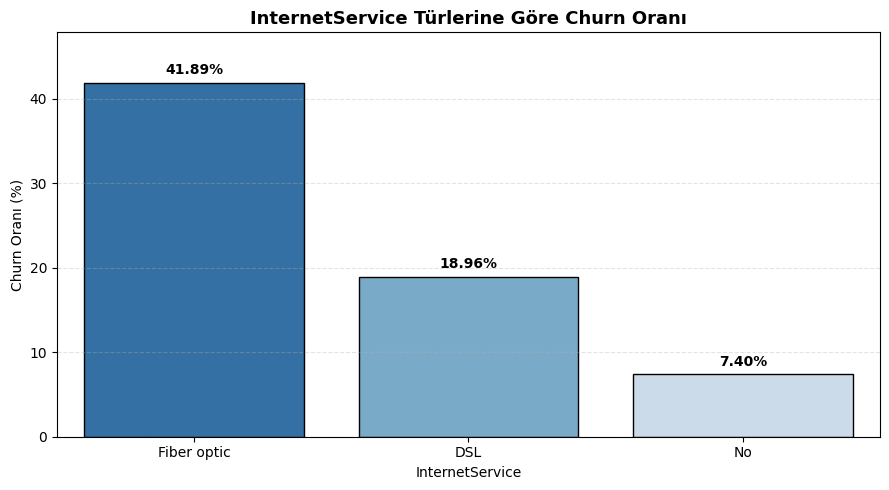

,InternetService,ChurnOraniYuzde
0,Fiber optic,41.89
1,DSL,18.96
2,No,7.40


In [12]:
# InternetService türlerine göre churn oranı - Matplotlib bar chart
churn_by_service = (
    df.assign(ChurnFlag=(df['Churn'] == 'Yes').astype(int))
      .groupby('InternetService', as_index=False)['ChurnFlag']
      .mean()
)

churn_by_service['ChurnOraniYuzde'] = (churn_by_service['ChurnFlag'] * 100).round(2)
churn_by_service = churn_by_service.sort_values('ChurnOraniYuzde', ascending=False).reset_index(drop=True)

plt.figure(figsize=(9, 5))
ax = sns.barplot(
    data=churn_by_service,
    x='InternetService',
    y='ChurnOraniYuzde',
    hue='InternetService',
    palette='Blues_r',
    edgecolor='black',
    legend=False
)

ax.set_title('InternetService Türlerine Göre Churn Oranı', fontsize=13, fontweight='bold')
ax.set_xlabel('InternetService')
ax.set_ylabel('Churn Oranı (%)')
ax.set_ylim(0, churn_by_service['ChurnOraniYuzde'].max() + 6)
ax.grid(axis='y', linestyle='--', alpha=0.35)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:.2f}%",
        (p.get_x() + p.get_width() / 2, height),
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        xytext=(0, 4),
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()

display(churn_by_service[['InternetService', 'ChurnOraniYuzde']])

🔍 BULGU: InternetService kırılımında churn oranı en yüksek `Fiber optic` (%41.89), ardından `DSL` (%18.96) ve `No` (%7.40) gelmektedir; risk net biçimde Fiber segmentinde yoğunlaşmıştır.

💼 ETKİ: Yüksek hacimli ve görece yüksek gelirli Fiber müşteri kaybı, toplam gelir erozyonunu hızlandırarak Müşteri Tutundurma Masası’nın finansal risk havuzunu kritik düzeye taşır.

⚡ AKSİYON: Yönetici önceliği olarak tutundurma bütçesi ve kampanya kapasitesinin ilk dalgasını Fiber müşterilere yönlendirin; ilk hedef, 90 gün içinde Fiber churn oranını çift haneli puan düşürmektir.

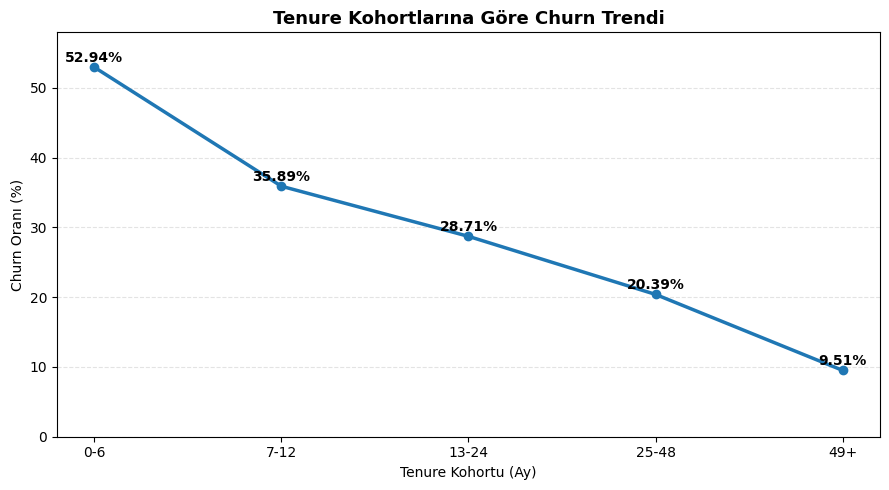

,tenure_cohort,MusteriSayisi,ChurnOraniYuzde
0,0-6,1481,52.94
1,7-12,705,35.89
2,13-24,1024,28.71
3,25-48,1594,20.39
4,49+,2239,9.51


In [13]:
# tenure kohortları ve churn trend line chart
cohort_bins = [-1, 6, 12, 24, 48, float('inf')]
cohort_labels = ['0-6', '7-12', '13-24', '25-48', '49+']

df['tenure_cohort'] = pd.cut(df['tenure'], bins=cohort_bins, labels=cohort_labels)

cohort_churn = (
    df.assign(ChurnFlag=(df['Churn'] == 'Yes').astype(int))
      .groupby('tenure_cohort', as_index=False, observed=False)
      .agg(MusteriSayisi=('ChurnFlag', 'count'), ChurnOrani=('ChurnFlag', 'mean'))
)
cohort_churn['ChurnOraniYuzde'] = (cohort_churn['ChurnOrani'] * 100).round(2)

plt.figure(figsize=(9, 5))
plt.plot(
    cohort_churn['tenure_cohort'].astype(str),
    cohort_churn['ChurnOraniYuzde'],
    marker='o',
    linewidth=2.5,
    color='#1f77b4'
)

plt.title('Tenure Kohortlarına Göre Churn Trendi', fontsize=13, fontweight='bold')
plt.xlabel('Tenure Kohortu (Ay)')
plt.ylabel('Churn Oranı (%)')
plt.grid(axis='y', linestyle='--', alpha=0.35)
plt.ylim(0, cohort_churn['ChurnOraniYuzde'].max() + 5)

for x, y in zip(cohort_churn['tenure_cohort'].astype(str), cohort_churn['ChurnOraniYuzde']):
    plt.text(x, y + 0.8, f"{y:.2f}%", ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

display(cohort_churn[['tenure_cohort', 'MusteriSayisi', 'ChurnOraniYuzde']])

🔍 BULGU: Churn trendi yaşam döngüsü boyunca keskin şekilde düşüyor: `0-6 ay %52.94`, `7-12 ay %35.89`, `13-24 ay %28.71`, `25-48 ay %20.39`, `49+ ay %9.51`; en kritik risk penceresi ilk 6 aydır.

💼 ETKİ: Müşteri Tutundurma Masası açısından erken dönem kayıplar, edinim maliyeti geri kazanılmadan müşteri ayrılığına yol açarak gelir ve CLV üzerinde en yüksek baskıyı oluşturur.

⚡ AKSİYON: Yaşam döngüsü odaklı müdahale planında bütçe ve ekip kapasitesinin birinci önceliğini `0-6 ay` kohortuna verin; ilk 90 gün temas planı + teklif optimizasyonu ile churn’i kademeli olarak alt kohort seviyelerine yaklaştırın.

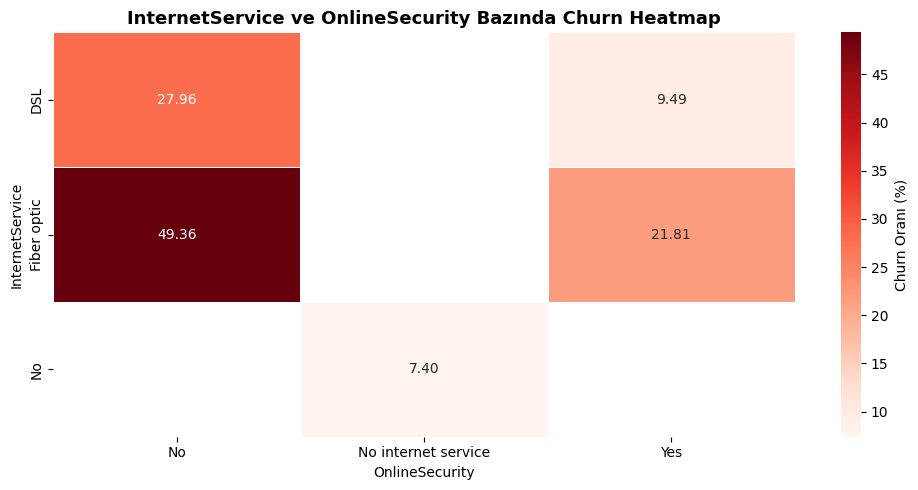

En riskli hot-spot kombinasyonu:
Fiber optic + No | Churn Oranı: %49.36 | Churn: 1114/2257


,InternetService,OnlineSecurity,ChurnOraniYuzde
0,Fiber optic,No,49.36
1,DSL,No,27.96
2,Fiber optic,Yes,21.81
3,DSL,Yes,9.49
4,No,No internet service,7.40


In [14]:
# InternetService x OnlineSecurity ilişkisinde churn heatmap
heatmap_data = (
    df.assign(ChurnFlag=(df['Churn'] == 'Yes').astype(int))
      .groupby(['InternetService', 'OnlineSecurity'])['ChurnFlag']
      .mean()
      .mul(100)
      .round(2)
      .unstack()
)

plt.figure(figsize=(10, 5))
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.2f',
    cmap='Reds',
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'Churn Oranı (%)'}
)

ax.set_title('InternetService ve OnlineSecurity Bazında Churn Heatmap', fontsize=13, fontweight='bold')
ax.set_xlabel('OnlineSecurity')
ax.set_ylabel('InternetService')
plt.tight_layout()
plt.show()

# En riskli hot-spot kombinasyonu
hotspot = heatmap_data.stack().sort_values(ascending=False).reset_index()
hotspot.columns = ['InternetService', 'OnlineSecurity', 'ChurnOraniYuzde']

hotspot_service = hotspot.loc[0, 'InternetService']
hotspot_security = hotspot.loc[0, 'OnlineSecurity']
hotspot_rate = hotspot.loc[0, 'ChurnOraniYuzde']

hotspot_count = len(df[(df['InternetService'] == hotspot_service) & (df['OnlineSecurity'] == hotspot_security)])
hotspot_churn_count = ((df['InternetService'] == hotspot_service) & (df['OnlineSecurity'] == hotspot_security) & (df['Churn'] == 'Yes')).sum()

print('En riskli hot-spot kombinasyonu:')
print(f"{hotspot_service} + {hotspot_security} | Churn Oranı: %{hotspot_rate:.2f} | Churn: {hotspot_churn_count}/{hotspot_count}")

display(hotspot)

🔍 BULGU: Heatmap’e göre en riskli hot-spot kombinasyonu `Fiber optic + OnlineSecurity=No`; churn oranı `%49.36` ve kayıp hacmi `1114/2257` ile tüm kombinasyonlar içinde ilk sıradadır.

💼 ETKİ: Bu hot-spot, hem yüksek oran hem yüksek müşteri hacmi nedeniyle Müşteri Tutundurma Masası’nın finansal risk havuzunu en hızlı büyüten kritik segmenttir.

⚡ AKSİYON: Acil müdahale olarak Fiber + Güvenliksiz müşteriler için “güvenlik paketi dahil fiyat-koruma teklifini” ilk temas kuralı haline getirin ve bu segmentte haftalık churn KPI’ını yönetim seviyesinde takip edin.

In [16]:
# InternetService bazında etkileşimli Plotly churn dağılımı
from IPython.display import HTML, display

internet_churn_dist = (
    df.groupby(['InternetService', 'Churn'], as_index=False)
      .size()
      .rename(columns={'size': 'MusteriSayisi'})
)

internet_totals = (
    internet_churn_dist.groupby('InternetService', as_index=False)['MusteriSayisi']
    .sum()
    .rename(columns={'MusteriSayisi': 'ToplamMusteri'})
)

internet_churn_dist = internet_churn_dist.merge(internet_totals, on='InternetService', how='left')
internet_churn_dist['OranYuzde'] = (internet_churn_dist['MusteriSayisi'] / internet_churn_dist['ToplamMusteri'] * 100).round(2)

fig = px.bar(
    internet_churn_dist,
    x='InternetService',
    y='MusteriSayisi',
    color='Churn',
    barmode='group',
    text='MusteriSayisi',
    title='InternetService Bazında Churn Dağılımı (Etkileşimli)',
    category_orders={'Churn': ['Yes', 'No']},
    color_discrete_map={'Yes': '#d62728', 'No': '#1f77b4'},
    custom_data=['OranYuzde', 'ToplamMusteri']
)

fig.update_traces(
    textposition='outside',
    hovertemplate='InternetService: %{x}<br>Churn: %{fullData.name}<br>Müşteri Sayısı: %{y}<br>Segment İçindeki Pay: %{customdata[0]}%<br>Toplam Segment: %{customdata[1]}<extra></extra>'
)

fig.update_layout(
    xaxis_title='InternetService',
    yaxis_title='Müşteri Sayısı',
    legend_title='Churn',
    template='plotly_white',
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

display(HTML(fig.to_html(full_html=False, include_plotlyjs='cdn')))
display(internet_churn_dist.sort_values(['InternetService', 'Churn']))

,InternetService,Churn,MusteriSayisi,ToplamMusteri,OranYuzde
0,DSL,No,1962,2421,81.04
1,DSL,Yes,459,2421,18.96
2,Fiber optic,No,1799,3096,58.11
3,Fiber optic,Yes,1297,3096,41.89
4,No,No,1413,1526,92.60
5,No,Yes,113,1526,7.40


🔍 BULGU: Etkileşimli Plotly grafiği, `InternetService` segmentlerinde churn dağılımını tek ekranda hem sayı hem oran olarak gösteriyor; özellikle `Fiber optic` segmentinde churn payı `%41.89` ile risk yoğunluğu net biçimde ayrışıyor.

💼 ETKİ: Yönetici sunumunda interaktif yapı (hover ile oran, hacim ve kıyas bilgisi) karar hızını artırır, yanlış yorum riskini azaltır ve toplantı sırasında anlık “neden-bu-segment” sorularına veriyle cevap verilmesini sağlar.

⚡ AKSİYON: Yönetim dashboard’larında statik grafik yerine Plotly standardı benimseyin; tüm kritik churn görsellerinde hover metriklerini (adet, oran, toplam segment) zorunlu hale getirerek aksiyon toplantılarını veri odaklı ve daha kısa sürede sonuçlanır hale getirin.

## Yönetici Özeti

### Top 3 Bulgu
1. **Kritik kayıp seviyesi:** Toplam churn oranı `%26.54` ve kayıp müşteri havuzunun aylık gelir etkisi toplam gelirin yaklaşık `%30.50`’sine ulaşıyor; mevcut tablo gelir sürdürülebilirliği açısından yüksek risk taşıyor.
2. **En riskli müşteri profili:** En kritik hot-spot `Fiber optic + OnlineSecurity yok` segmenti; churn oranı `%49.36` (1114/2257) ile hem oran hem hacim bazında birinci risk noktası.
3. **Yaşam döngüsü kırılması:** Churn, müşteri yaşlandıkça belirgin düşüyor; `0-6 ay` kohortunda `%52.94` olan oran `49+ ay` kohortunda `%9.51`’e iniyor. En büyük kayıp baskısı erken dönemde oluşuyor.

### Top 3 Aksiyon Önerisi
1. **İlk 90 gün tutundurma programı başlatın:** İlk 6 ay müşterilerine özel onboarding, ilk-fatura dengeleme ve proaktif temas akışını standart hale getirerek erken dönem churn’i hızlıca düşürün.
2. **Fiber + Güvenliksiz segmenti birinci öncelik yapın:** Bu segmente özel “güvenlik paketi dahil fiyat-koruma” teklifini zorunlu kampanya kuralı olarak uygulayın ve haftalık yönetim KPI’ı ile takip edin.
3. **Etkileşimli karar paneliyle yönetin:** Segment bazlı churn oranı, hacim ve gelir riski göstergelerini interaktif dashboard’da birleştirip toplantı içi anlık karar almayı hızlandırın; aksiyon bütçesini risk yoğunluğu en yüksek segmentlere dinamik dağıtın.